# YOLO network to detect items on a sorter

## Splitting data

In [ ]:
!python train_val_split.py --datapath="custom_data" --train_pct=0.9

## Generating data.yaml file

In [10]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': 'data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = 'custom_data/classes.txt'
path_to_data_yaml = 'data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat data.yaml

Created config file at data.yaml

File contents:

path: data
train: train/images
val: validation/images
nc: 3
names:
- nut
- pad
- screw


## Traning YOLO

In [1]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt') 
model.train(data='data.yaml', epochs=60, imgsz=640)

100%|██████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 10.3MB/s]


New https://pypi.org/project/ultralytics/8.3.137 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.135 🚀 Python-3.10.16 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=Fals

train: Scanning /home/szymons3234/DATA/Projekt YOLO/data/train/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100%


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 125.4±16.7 MB/s, size: 40.2 KB)


val: Scanning /home/szymons3234/DATA/Projekt YOLO/data/validation/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 1


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60         2G      1.292      3.551      1.106         63        640: 100%|██████████| 6/6 [00:01<00:00,  3.56i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144     0.0107      0.434     0.0901     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.02G      1.199      3.025      1.015        110        640: 100%|██████████| 6/6 [00:00<00:00,  7.19i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144     0.0257      0.941       0.47      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.03G      1.213      1.836       1.03         97        640: 100%|██████████| 6/6 [00:00<00:00,  8.14i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.664      0.232      0.519      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.05G      1.188      1.349      1.026        139        640: 100%|██████████| 6/6 [00:00<00:00,  7.85i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.983      0.276      0.632      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.07G      1.115      1.149     0.9969        105        640: 100%|██████████| 6/6 [00:00<00:00,  6.62i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.957      0.294      0.714      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.09G       1.14      1.005     0.9999        116        640: 100%|██████████| 6/6 [00:00<00:00,  6.97i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144       0.96      0.308      0.848      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60       2.1G      1.073     0.9533      1.004         67        640: 100%|██████████| 6/6 [00:00<00:00,  7.86i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.969      0.431      0.932       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.12G      1.053     0.8805     0.9621        104        640: 100%|██████████| 6/6 [00:00<00:00,  7.46i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.945      0.448      0.941      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.12G      1.047     0.8508     0.9905        114        640: 100%|██████████| 6/6 [00:00<00:00,  9.30i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.979      0.601      0.972      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.12G       1.03     0.7982     0.9882        118        640: 100%|██████████| 6/6 [00:00<00:00,  7.55i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.968      0.678      0.979      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.12G      1.062     0.7992     0.9888        122        640: 100%|██████████| 6/6 [00:00<00:00,  7.64i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144       0.97       0.72      0.983       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.12G      1.043     0.7892     0.9726         96        640: 100%|██████████| 6/6 [00:00<00:00,  6.88i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.958      0.852      0.981      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.12G      1.083     0.8036     0.9968         99        640: 100%|██████████| 6/6 [00:00<00:00,  7.77i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.947      0.911      0.976      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.12G      1.021     0.7771     0.9832        109        640: 100%|██████████| 6/6 [00:00<00:00,  8.04i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.919      0.932      0.946      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.13G      1.034     0.7606     0.9753         73        640: 100%|██████████| 6/6 [00:00<00:00,  7.13i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.916      0.948      0.972      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.15G       1.02     0.7358      0.969         91        640: 100%|██████████| 6/6 [00:00<00:00,  8.57i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.915      0.963      0.975      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.16G     0.9933     0.7239     0.9459         77        640: 100%|██████████| 6/6 [00:00<00:00,  7.51i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00


                   all         18        144      0.973      0.942       0.98      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.18G      1.017      0.725     0.9712         94        640: 100%|██████████| 6/6 [00:01<00:00,  5.48i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.939      0.972      0.982      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60       2.2G     0.9919     0.7535     0.9718         53        640: 100%|██████████| 6/6 [00:00<00:00,  8.49i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.923      0.969      0.981      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.21G     0.9728     0.7197     0.9639        129        640: 100%|██████████| 6/6 [00:00<00:00,  8.11i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.922      0.976      0.978      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.21G     0.9987      0.699     0.9699         93        640: 100%|██████████| 6/6 [00:00<00:00,  8.98i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.948      0.982      0.979      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.21G     0.9765     0.6988       0.97        109        640: 100%|██████████| 6/6 [00:00<00:00,  7.22i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.978      0.968      0.981      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.29G     0.9696     0.6823     0.9438         98        640: 100%|██████████| 6/6 [00:00<00:00,  8.65i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.974      0.975      0.983      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.29G      1.006     0.6916     0.9681         93        640: 100%|██████████| 6/6 [00:00<00:00,  7.84i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.984      0.983      0.987      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.29G     0.9509     0.6707     0.9583        100        640: 100%|██████████| 6/6 [00:00<00:00,  9.83i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144       0.98      0.984      0.988      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.29G     0.9514     0.6631     0.9425        120        640: 100%|██████████| 6/6 [00:00<00:00,  8.11i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144       0.99      0.984      0.988      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.29G     0.9706     0.6563     0.9638         94        640: 100%|██████████| 6/6 [00:00<00:00,  8.49i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.988      0.982      0.988      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      2.29G     0.9179     0.6254     0.9371         94        640: 100%|██████████| 6/6 [00:00<00:00,  7.93i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.988      0.969      0.988       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.29G     0.9666     0.6384      0.957        105        640: 100%|██████████| 6/6 [00:00<00:00,  8.58i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.995      0.966      0.988      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      2.29G     0.9284     0.6358     0.9403        123        640: 100%|██████████| 6/6 [00:00<00:00,  8.36i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.979      0.983      0.987      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      2.29G      0.927      0.629     0.9413         69        640: 100%|██████████| 6/6 [00:00<00:00,  8.46i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144       0.98      0.984      0.987      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      2.29G      0.926     0.6017     0.9399         95        640: 100%|██████████| 6/6 [00:00<00:00,  7.31i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.983      0.983      0.986      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.29G     0.9151     0.6089     0.9486        117        640: 100%|██████████| 6/6 [00:00<00:00,  9.24i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.984      0.984      0.986      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.29G     0.9303     0.5941     0.9371         99        640: 100%|██████████| 6/6 [00:00<00:00,  8.93i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.989      0.984      0.987      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.29G     0.9054     0.6163     0.9445         76        640: 100%|██████████| 6/6 [00:00<00:00,  9.15i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.987      0.984      0.987       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      2.29G     0.9289     0.5882      0.951        106        640: 100%|██████████| 6/6 [00:00<00:00,  9.41i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.986      0.984      0.988      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.29G       0.91     0.5868     0.9406        113        640: 100%|██████████| 6/6 [00:00<00:00,  8.40i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.986      0.984      0.988      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.29G     0.8704     0.5796     0.9454         82        640: 100%|██████████| 6/6 [00:00<00:00,  8.20i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00


                   all         18        144      0.988      0.984      0.988      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      2.29G     0.8993     0.5779     0.9417         75        640: 100%|██████████| 6/6 [00:00<00:00,  9.12i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.994      0.984      0.988      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      2.29G     0.8839     0.5789     0.9422         70        640: 100%|██████████| 6/6 [00:00<00:00,  8.69i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.996      0.984      0.987      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.29G     0.8994     0.5851     0.9545         90        640: 100%|██████████| 6/6 [00:00<00:00,  8.92i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.994      0.984      0.987      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      2.29G     0.8947     0.5644     0.9345        114        640: 100%|██████████| 6/6 [00:00<00:00,  9.03i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.994      0.983      0.988      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      2.29G     0.9107     0.5694       0.94        106        640: 100%|██████████| 6/6 [00:00<00:00,  8.21i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.989      0.984      0.988      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.29G      0.892     0.5647     0.9273        102        640: 100%|██████████| 6/6 [00:00<00:00,  8.32i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144       0.99      0.984      0.988      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.29G     0.8615      0.548     0.9459         71        640: 100%|██████████| 6/6 [00:00<00:00,  9.43i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144       0.99      0.984      0.988      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.29G     0.8827     0.5436     0.9299        104        640: 100%|██████████| 6/6 [00:00<00:00,  8.71i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.991      0.979      0.988        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.29G     0.8906     0.5531     0.9492         63        640: 100%|██████████| 6/6 [00:00<00:00,  7.62i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.992       0.98      0.988      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      2.29G     0.8705      0.553     0.9411        104        640: 100%|██████████| 6/6 [00:01<00:00,  4.41i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.991      0.979      0.988      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      2.29G     0.8678     0.5485     0.9206        148        640: 100%|██████████| 6/6 [00:00<00:00,  7.60i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.997      0.984      0.988      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      2.29G     0.8762     0.5394     0.9359         76        640: 100%|██████████| 6/6 [00:00<00:00,  8.16i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.996      0.984      0.988       0.81


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      2.29G     0.8623     0.5906     0.9461         57        640: 100%|██████████| 6/6 [00:01<00:00,  5.06i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.995      0.979      0.988      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      2.29G     0.8468      0.581     0.9149         55        640: 100%|██████████| 6/6 [00:00<00:00,  8.67i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.993      0.979      0.988      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      2.29G     0.8239     0.5463     0.9155         55        640: 100%|██████████| 6/6 [00:00<00:00,  9.23i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.992      0.979      0.987      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.29G     0.8033     0.5553     0.9074         57        640: 100%|██████████| 6/6 [00:00<00:00,  8.82i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.992      0.979      0.988      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      2.31G     0.8252     0.5505     0.9127         61        640: 100%|██████████| 6/6 [00:00<00:00,  9.56i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.992      0.979      0.988      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      2.31G     0.8149     0.5406     0.9218         57        640: 100%|██████████| 6/6 [00:00<00:00,  8.68i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.994      0.984      0.988      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      2.31G     0.8175      0.529     0.9126         62        640: 100%|██████████| 6/6 [00:00<00:00,  8.47i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.996      0.984      0.988      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      2.31G     0.8013     0.5136     0.9124         62        640: 100%|██████████| 6/6 [00:00<00:00,  9.08i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.997      0.984      0.988      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.31G     0.8057     0.5157     0.9092         59        640: 100%|██████████| 6/6 [00:00<00:00,  9.13i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.997      0.984      0.988      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.31G     0.7863     0.5217     0.9024         58        640: 100%|██████████| 6/6 [00:00<00:00,  8.93i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         18        144      0.998      0.984      0.988      0.822



60 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.135 🚀 Python-3.10.16 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00


                   all         18        144      0.998      0.984      0.988      0.822
                   nut         17         61      0.997          1      0.995      0.787
                   pad         18         40      0.999          1      0.995      0.859
                 screw         18         43      0.996      0.953      0.974      0.821
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train10


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f54273eee30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## Predicting images

In [2]:
model = YOLO('runs/detect/train9/weights/best.pt')


results = model.predict(
    source='data/validation/images',  
    save=True                          
)


image 1/18 /home/szymons3234/DATA/Projekt YOLO/data/validation/images/1c83e9d1-zdj_9.jpg: 480x640 4 nuts, 1 pad, 3 screws, 52.5ms
image 2/18 /home/szymons3234/DATA/Projekt YOLO/data/validation/images/2be22451-zdj_74.jpg: 480x640 3 nuts, 2 pads, 3 screws, 30.9ms
image 3/18 /home/szymons3234/DATA/Projekt YOLO/data/validation/images/406feba8-zdj_12.jpg: 480x640 4 nuts, 3 pads, 3 screws, 28.7ms
image 4/18 /home/szymons3234/DATA/Projekt YOLO/data/validation/images/4f04fd11-zdj_58.jpg: 480x640 2 nuts, 1 pad, 1 screw, 30.6ms
image 5/18 /home/szymons3234/DATA/Projekt YOLO/data/validation/images/5b9dc17c-zdj_16.jpg: 480x640 4 nuts, 3 pads, 3 screws, 30.7ms
image 6/18 /home/szymons3234/DATA/Projekt YOLO/data/validation/images/7bcb92be-zdj_2.jpg: 480x640 4 nuts, 3 pads, 3 screws, 9.2ms
image 7/18 /home/szymons3234/DATA/Projekt YOLO/data/validation/images/7f2e9e23-zdj_41.jpg: 480x640 4 nuts, 3 pads, 3 screws, 9.8ms
image 8/18 /home/szymons3234/DATA/Projekt YOLO/data/validation/images/8225f380-zdj

## Displaying images

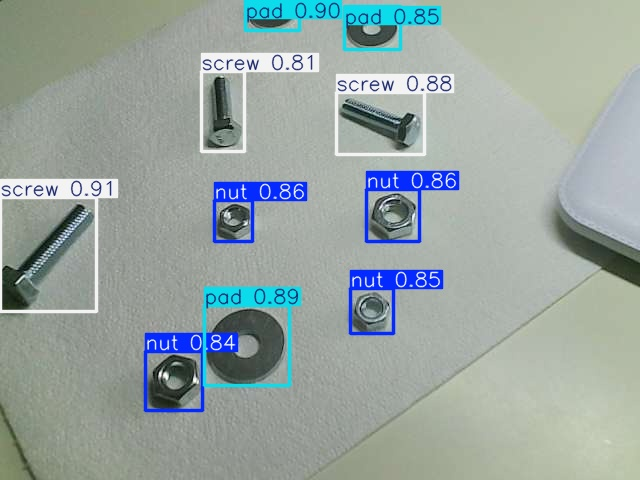

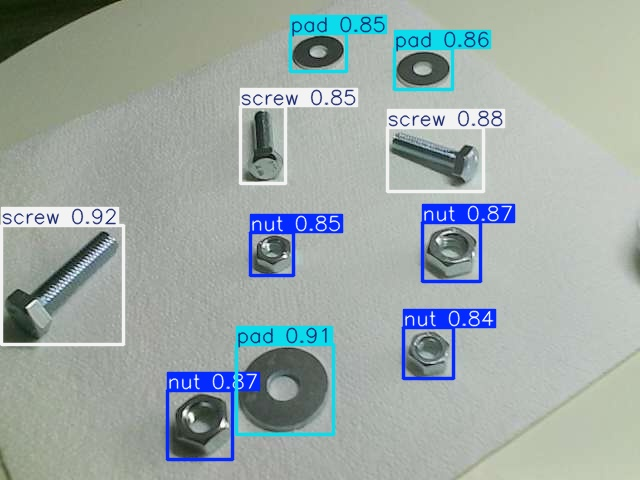

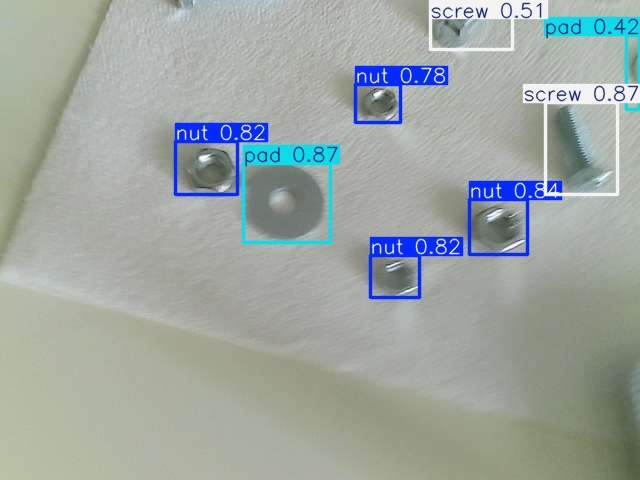

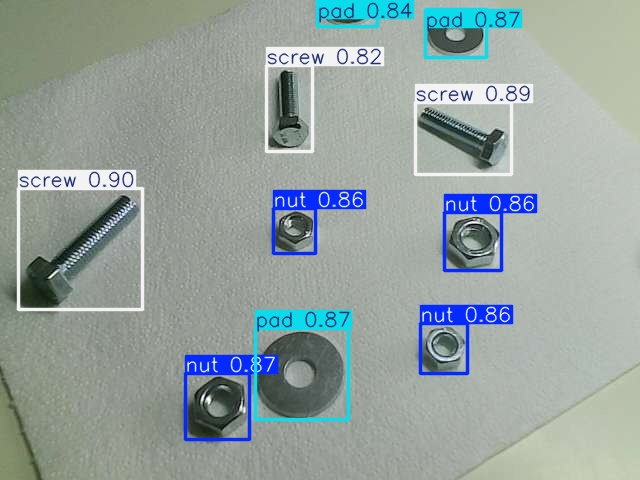

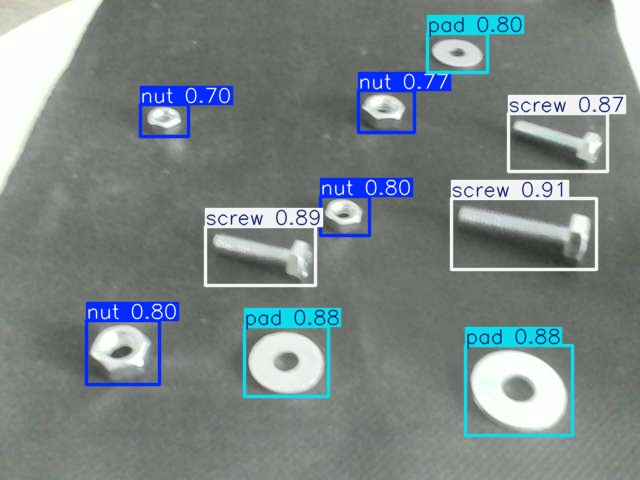

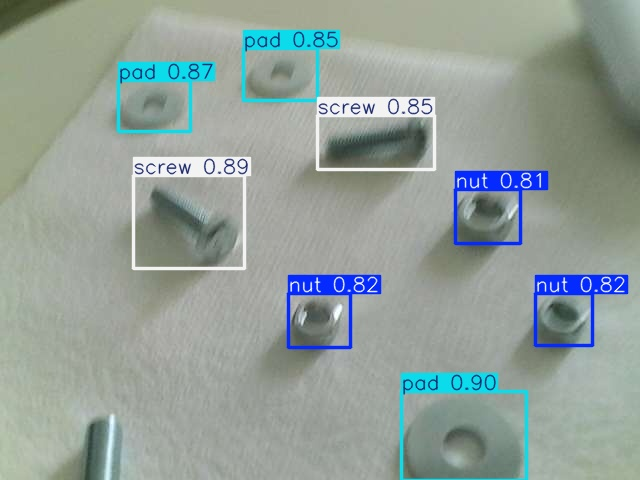

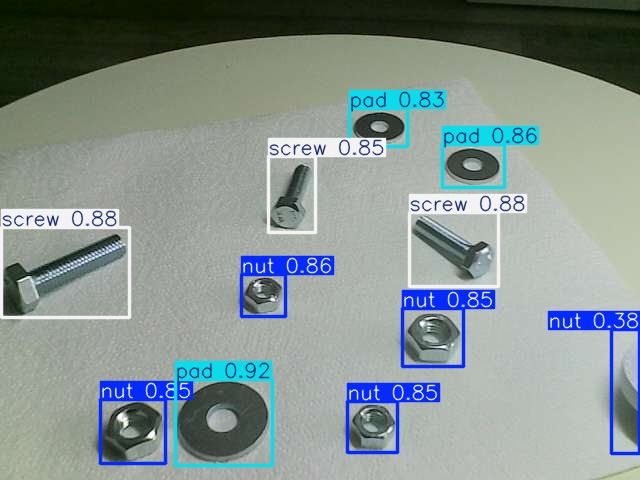

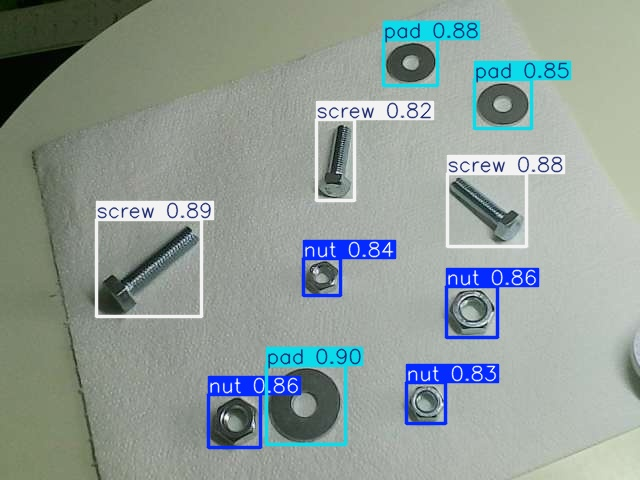

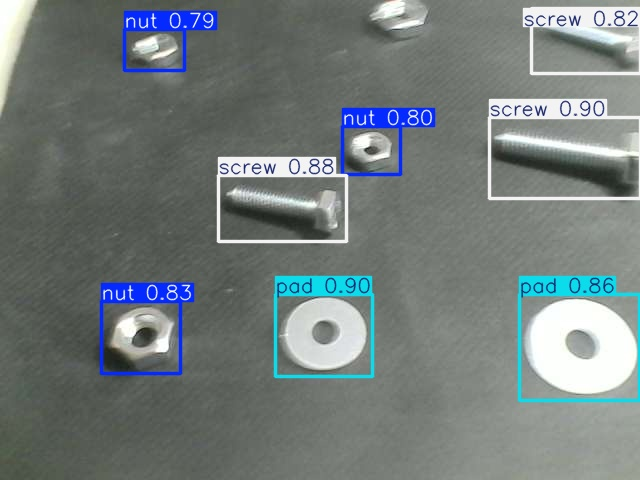

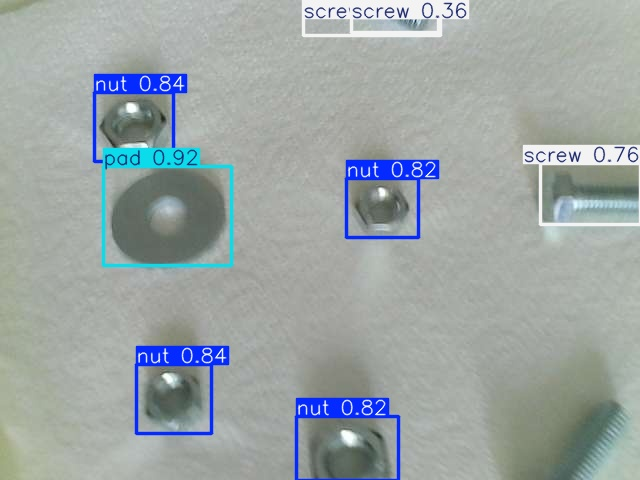

In [3]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')